# Quick 2 start for v.1.1.2

This is a quick start tutorial, please read the full [userguide](https://jetset.readthedocs.io/en/1.1.2/user_guide/user_guide.html)

for more info  [ssc section of the userguide](https://jetset.readthedocs.io/en/1.1.2/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html)

# Lodaing SED

For more details see the [usergide data format section](https://jetset.readthedocs.io/en/1.1.2/user_guide/load_data/Jet_example_load_data.html)
The data are treated using two classes from the module `data_loader` module

`jetset.data_loader.Data` class 

`jetset.data_loader.ObsData` class 

The class  `jetset.data_loader.Data` is in charge of storing the data, giving access to the I/O functionalities, and provides an interface  to the astropy`Table` class (see the  [astropy table](https://docs.astropy.org/en/stable/table/>) documentation, for further information)

The class  `jetset.data_loader.ObsData` uses the information stored in :class:`jetset.data_loader.Data`, and can perform several operations 
 
 - rebinning (grouping) of the data
 - selection of time ranges
 - selection of datasets
 - transformation from linear to logarithmic representation
 - handling of errors and systematics


In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs

In [5]:
data=Data.from_file(test_SEDs[2])
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
2299540000.0,0.0,3.6892e-14,2.668e-15,0.0,0.0,False,0.0
2639697000.0,0.0,4.12456e-14,9.712535e-26,0.0,0.0,False,0.0
4799040000.0,0.0,7.0368e-14,4.8e-16,0.0,0.0,False,0.0
4805039000.0,0.0,5.435586e-14,5.435586e-15,0.0,0.0,False,0.0
4805039000.0,0.0,3.239547e-14,3.239547e-15,0.0,0.0,False,0.0
4843552000.0,0.0,7.174767e-14,7.333333e-26,0.0,0.0,False,0.0
4999750000.0,0.0,8e-14,3.344772e-15,0.0,0.0,False,0.0
7698460000.0,0.0,1.15577e-13,6.16e-16,0.0,0.0,False,0.0



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



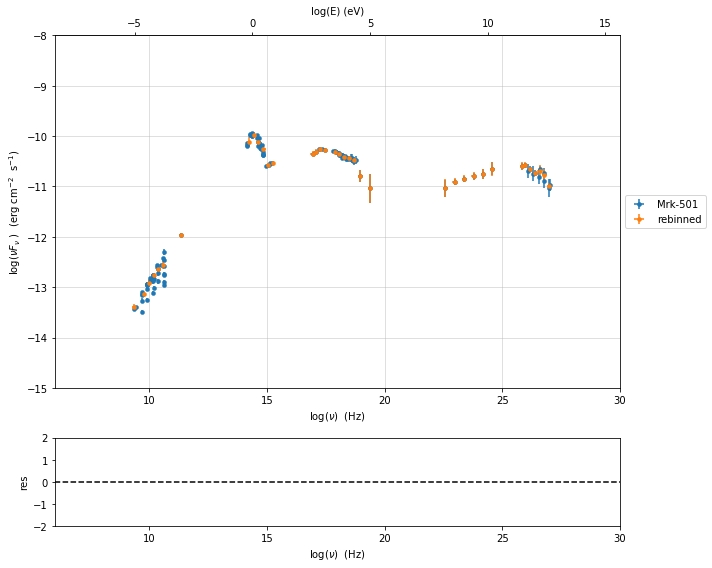

In [6]:
%matplotlib inline
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()
myPlot.rescale(y_min=-15)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')

In [7]:
sed_data.save('Mrk_501.pkl')

# Phenomenological model constraining


For more details see the usergide  corresponding [section](https://jetset.readthedocs.io/en/1.1.2/user_guide/phen_constr/Jet_example_phenom_constr.html)


## evaluation of spectral indices


*** evaluating spectral indices for data ***



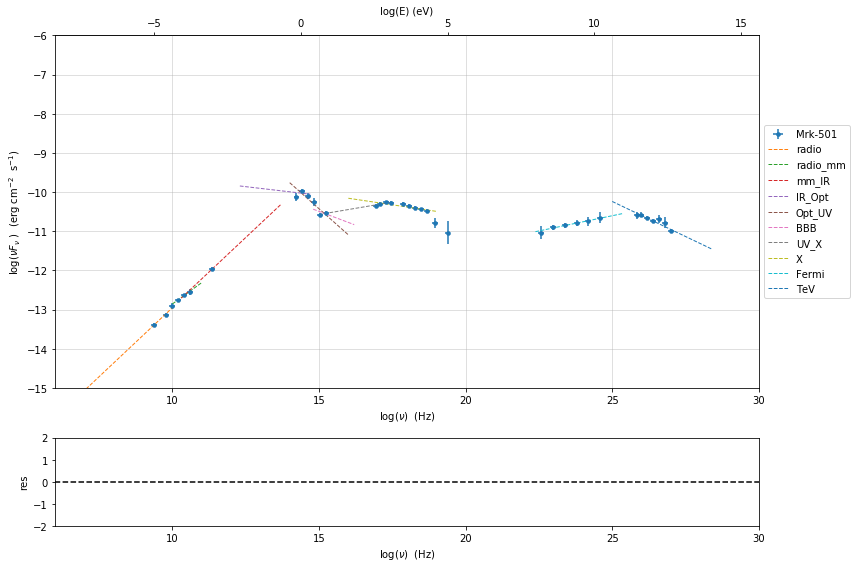

In [56]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

## log-log SED shaping

In [57]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP


 model name     name      bestfit val     err +     err -   start val   fit range min fit range max frozen
----------- ------------ ------------- ------------ ----- ------------- ------------- ------------- ------
   LogCubic            b -6.411144e-02 7.838941e-03    -- -4.778766e-02 -1.000000e+01  0.000000e+00  False
   LogCubic            c -1.751706e-03 1.127019e-03    --  3.576198e-03 -1.000000e+01  1.000000e+01  False
   LogCubic           Ep  1.703747e+01 9.437328e-02    --  1.626870e+01  0.000000e+00  3.000000e+01  False
   LogCubic           Sp -1.030068e+01 1.884113e-02    -- -1.025412e+01 -3.000000e+01  0.000000e+00  False
host_galaxy nuFnu_p_host -1.006556e+01 5.462496e-02    -- -1.025412e+01 -1.225412e+01 -8.254123e+00  False
host_galaxy     nu_scale  1.730750e-02 3.694862e-03    --  0.000000e+00 -5.000000e-01  5.000000e-01  False


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit


model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -1.310958e-01 3.244105e-02    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -3.300308e-02 2.072526e-02    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  2.549604e+01 2.235559e-01    --  2.556357e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -1.057946e+01 4.333061e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> IC         nu_p=+2.549604e+01 (err=+2.235559e-01)  nuFnu_p=-1.057946e+01 (err=+4.333061e-02) curv.=-1.310958e-01 (err=+3.244105e-02)



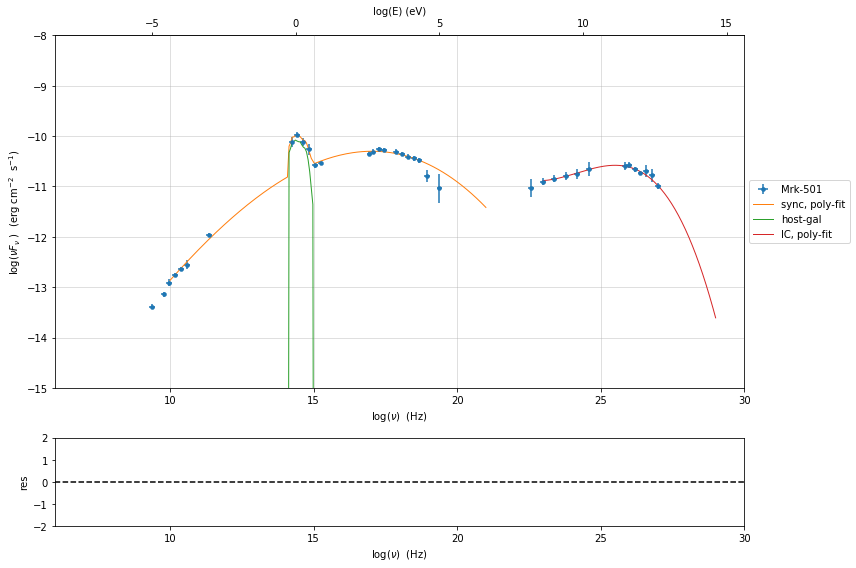

In [58]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit',silent=True)
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

## Model preconstrainin from sed shaping

In [59]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.name='prefit_jet'
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078494e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205572e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432066e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size           

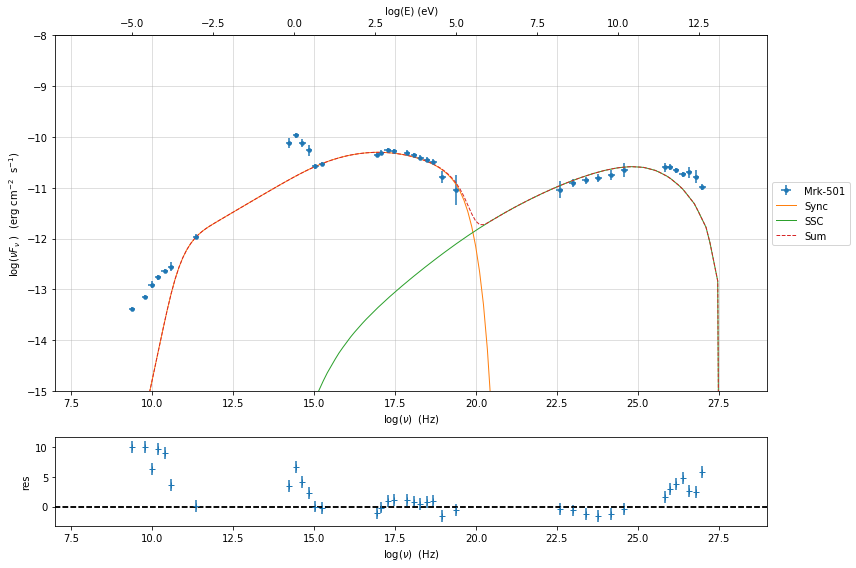

In [60]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

In [61]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='plc',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.name='prefit_jet'
prefit_jet.save_model('prefit_jet_gal_templ_plc.pkl')


***  constrains parameters from observable ***

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 5.086639e+02     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 5.267749e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 6.061374e-01     0.000000e+00               -- False  False
        p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
gamma_cut    turn-over-energy lorentz-factor* 1.062174e+06     1.000000e+00     1.000000e+09 False  False
        R         region_size              cm 7.434184e+16     1.000000e+03     1.000000e+30 False  False
      R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   Tr

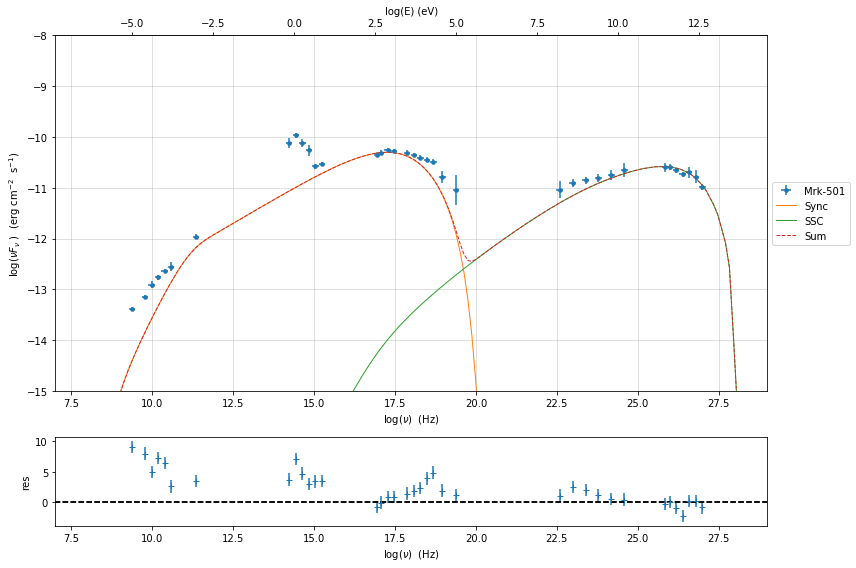

In [62]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

For more details see the [usergide data format section](https://jetset.readthedocs.io/en/1.1.2/user_guide/load_data/Jet_example_load_data.html)
The data are treated using two classes from the module `data_loader` module

In [21]:
def setup_start_pars(fit_model):
    
    fit_model.freeze('jet_leptonic','z_cosm')
    fit_model.freeze('jet_leptonic','R_H')
    fit_model.freeze('jet_leptonic','gmax')    
    fit_model.jet_leptonic.parameters.beam_obj.fit_range=[5,70]
    fit_model.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
    fit_model.host_galaxy.parameters.nuFnu_p_host.frozen=True
    fit_model.host_galaxy.parameters.nu_scale.frozen=True

## Numerical fitting with least square bound minimizer: PLC

In [65]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet
from jetset.minimizer import ModelMinimizer

jet_lsb_plc=Jet.load_model('prefit_jet_gal_templ_plc.pkl')
jet_lsb_plc.set_gamma_grid_size(200)
fit_model_lsb_plc=FitModel( jet=jet_lsb_plc, name='SSC-best-fit-lsb-plc',template=my_shape.host_gal)

setup_start_pars(fit_model_lsb_plc)

model_minimizer_lsb_plc=ModelMinimizer('lsb')
best_fit_lsb_plc=model_minimizer_lsb_plc.fit(fit_model_lsb_plc,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb-plc',repeat=3)

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 5.086639e+02     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 5.267749e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 6.061374e-01     0.000000e+00               -- False  False
        p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
gamma_cut    turn-over-energy lorentz-factor* 1.062174e+06     1.000000e+00     1.000000e+09 False  False
        R         region_size              cm 7.434184e+16     1.000000e+03     1.000000e+30 False  False
      R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   True
        B      magnetic_field               G 

In [66]:
best_fit_lsb_plc.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str12,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,5.619766e+02,9.887721e+02,--,5.086639e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,--,--,--,5.267749e+06,1.000000e+00,1.000000e+15,True
jet_leptonic,N,7.119091e-01,2.780277e+00,--,6.061374e-01,0.000000e+00,--,False
jet_leptonic,p,2.407599e+00,6.377170e-02,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,gamma_cut,1.472555e+06,1.023610e+06,--,1.062174e+06,1.000000e+00,1.000000e+09,False
jet_leptonic,R,7.649790e+16,1.243345e+17,--,7.434184e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,4.902554e-03,2.749046e-03,--,4.318660e-03,0.000000e+00,--,False
jet_leptonic,beam_obj,2.690403e+01,1.912955e+01,--,2.500000e+01,5.000000e+00,7.000000e+01,False


In [67]:
best_fit_lsb_plc.save_report('SSC-best-fit-lsp-plc.txt')
model_minimizer_lsb_plc.save_model('model_minimizer_lsb_plc.pkl')
fit_model_lsb_plc.save_model('fit_model_lsb_plc.pkl')

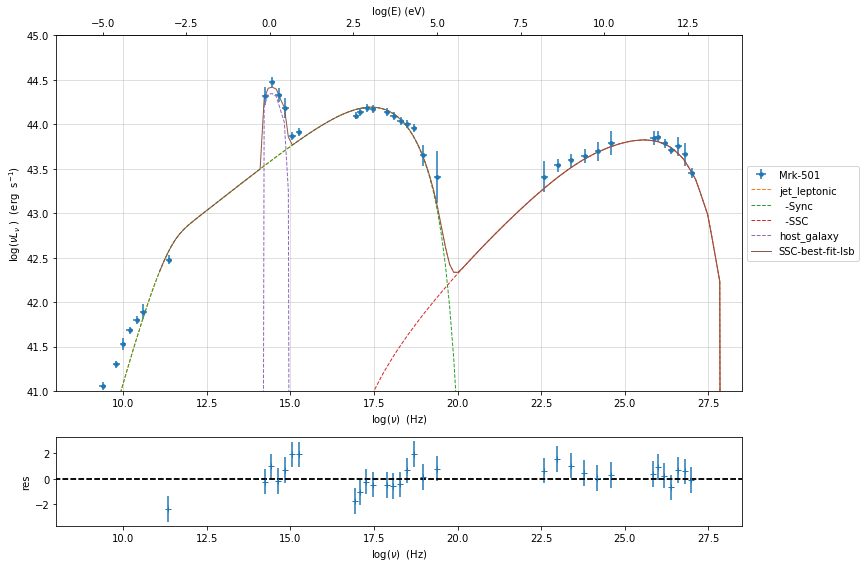

In [68]:
%matplotlib inline
fit_model_lsb_plc.set_nu_grid(1E6,1E30,200)
fit_model_lsb_plc.eval()
p2=fit_model_lsb_plc.plot_model(sed_data=sed_data,frame='src')
p2.rescale(y_min=41,y_max=45,x_min=8,x_max=28.5)

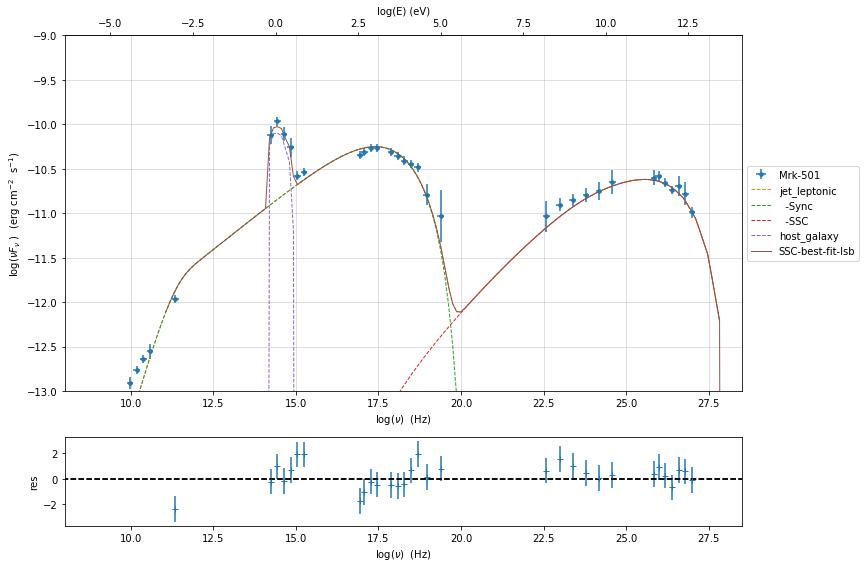

In [75]:
fit_model_lsb_plc.eval()
p2=fit_model_lsb_plc.plot_model(sed_data=sed_data,frame='obs')
p2.rescale(y_min=-13,y_max=-9,x_min=8,x_max=28.5)

## numerical fitting with least square bound minimizer: LPPL

In [76]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet
from jetset.minimizer import fit_SED

jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb_lppl=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb-lppl',template=my_shape.host_gal)
setup_start_pars(fit_model_lsb_lppl)



model_minimizer_lsb_lppl=ModelMinimizer('lsb')
best_fit_lsb_lppl=model_minimizer_lsb_lppl.fit(fit_model_lsb_lppl,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb-lppl',repeat=3)


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078494e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205572e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432066e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485641e+15     1.000000e+03     1.000000e

In [78]:
best_fit_lsb_lppl.save_report('SSC-best-fit-lbs-lppl.txt')
model_minimizer_lsb_lppl.save_model('model_minimizer_lsb_lppl.pkl')
fit_model_lsb_lppl.save_model('fit_model_lsb_lppl.pkl')

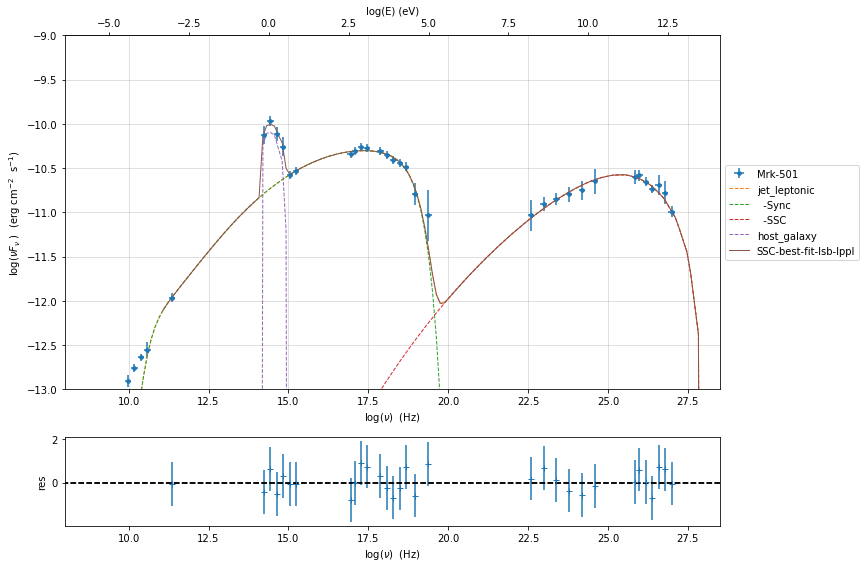

In [80]:
%matplotlib inline
fit_model_lsb_lppl.set_nu_grid(1E6,1E30,200)
fit_model_lsb_lppl.eval()
p2=fit_model_lsb_lppl.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,y_max=-9,x_min=8,x_max=28.5)

## Numerical fitting with minuit minimizer: LPPL


In [90]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet
from jetset.minimizer import fit_SED

jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_lsb.set_gamma_grid_size(200)

fit_model_minuit_lppl=FitModel( jet=jet_lsb, name='SSC-best-fit-minuit-lppl',template=my_shape.host_gal)
setup_start_pars(fit_model_minuit_lppl)



model_minimizer_minuit_lppl=ModelMinimizer('minuit')
best_fit_minuit_lppl=model_minimizer_lsb_lppl.fit(fit_model_minuit_lppl,sed_data,1E11,1E29,fitname='SSC-best-fit-minuit-lppl',repeat=3)

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078494e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205572e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432066e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485641e+15     1.000000e+03     1.000000e

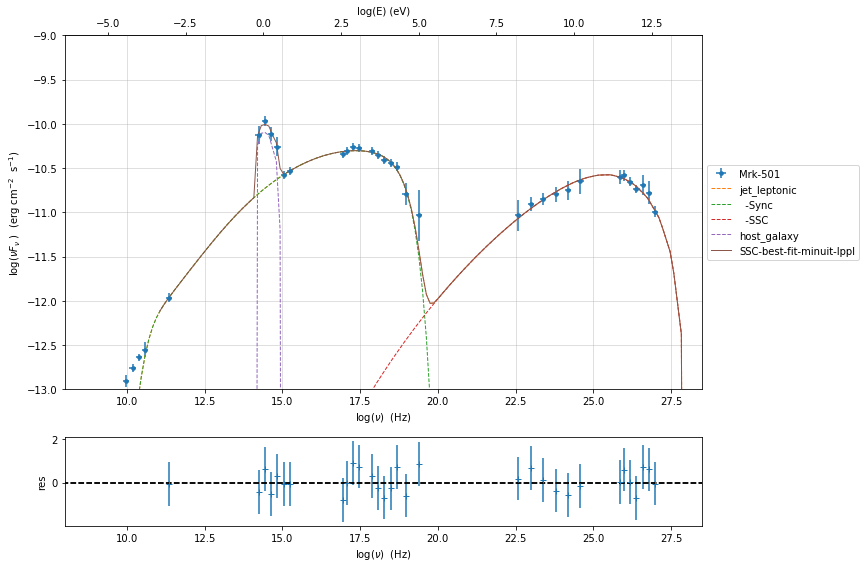

In [91]:
%matplotlib inline
fit_model_minuit_lppl.set_nu_grid(1E6,1E30,200)
fit_model_minuit_lppl.eval()
p2=fit_model_minuit_lppl.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,y_max=-9,x_min=8,x_max=28.5)

In [92]:
best_fit_minuit_lppl.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str16,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,1.010240e+02,1.602130e-01,--,1.057074e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,--,--,--,1.642067e+06,1.000000e+00,1.000000e+15,True
jet_leptonic,N,4.507970e+01,5.008018e+01,--,1.078494e+02,0.000000e+00,--,False
jet_leptonic,s,2.080049e+00,1.725391e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,1.980588e-01,3.302396e-02,--,3.205572e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,gamma0_log_parab,1.613158e+03,2.546008e+03,--,7.432066e+03,1.000000e+00,1.000000e+09,False
jet_leptonic,R,6.954593e+15,6.306979e+15,--,5.485641e+15,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.295251e-02,4.472382e-03,--,1.000000e-01,0.000000e+00,--,False


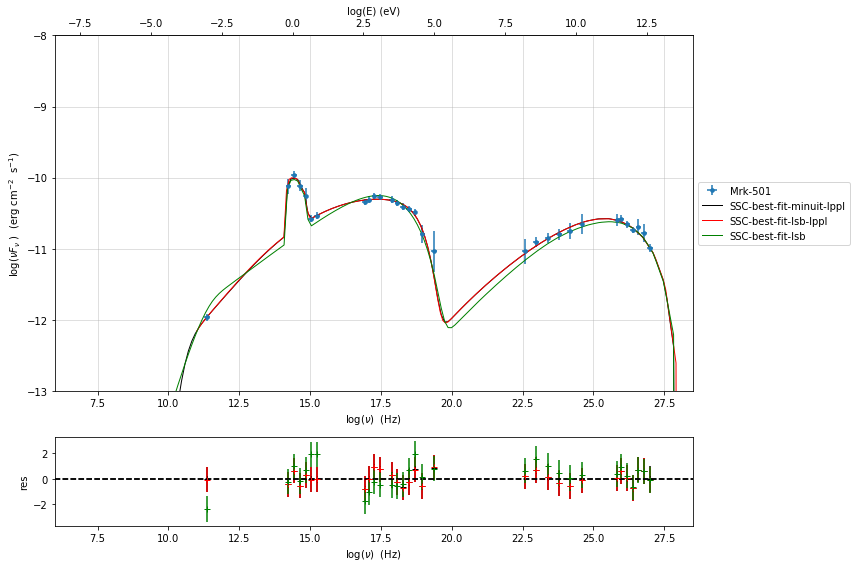

In [93]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
#fit_model_minuit.set_nu_grid(1E6,1E30,200)
#fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit_lppl,color='black')
p2.add_residual_plot(fit_model_minuit_lppl,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb_lppl,color='red')
p2.add_residual_plot(fit_model_lsb_lppl,sed_data,fit_range=[ 11,29],color='red')
p2.add_model_plot(fit_model_lsb_plc,color='green')
p2.add_residual_plot(fit_model_lsb_plc,sed_data,fit_range=[ 11,29],color='green')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## MCMC sampling

In [8]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer

In [10]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_lsb_lppl.pkl')


mcmc=McmcSampler(model_minimizer_minuit)

labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting


100%|██████████| 50/50 [06:02<00:00,  7.24s/it]

mcmc run done, with 1 threads took 369.58 seconds


In [22]:
print(mcmc.acceptance_fraction)

0.546875


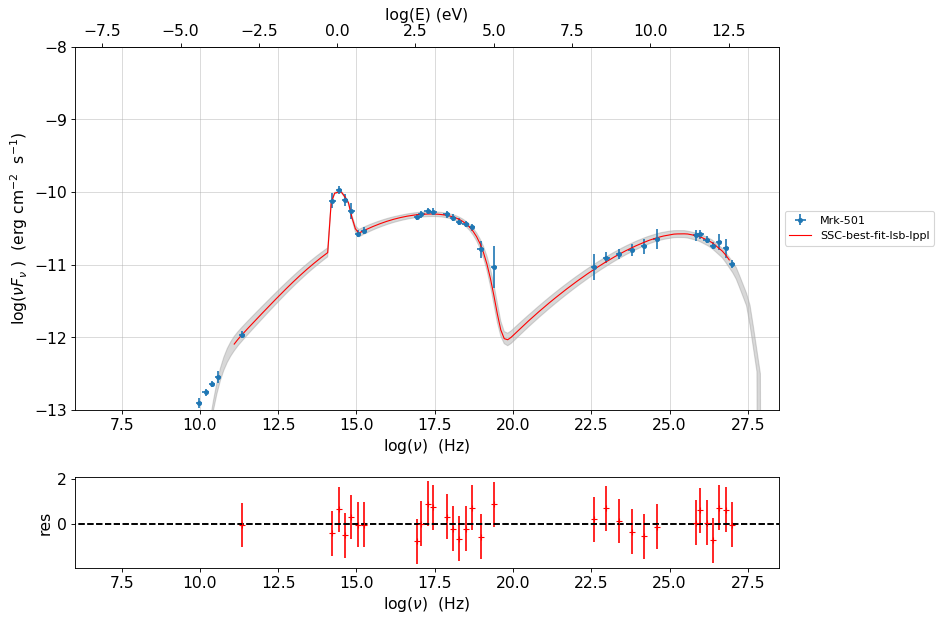

In [29]:
model_minimizer_minuit.fit_Model.set_nu_grid(1E8,1E30,200)
p=mcmc.plot_model(sed_data=sed_data,fit_range=[11., 27.],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

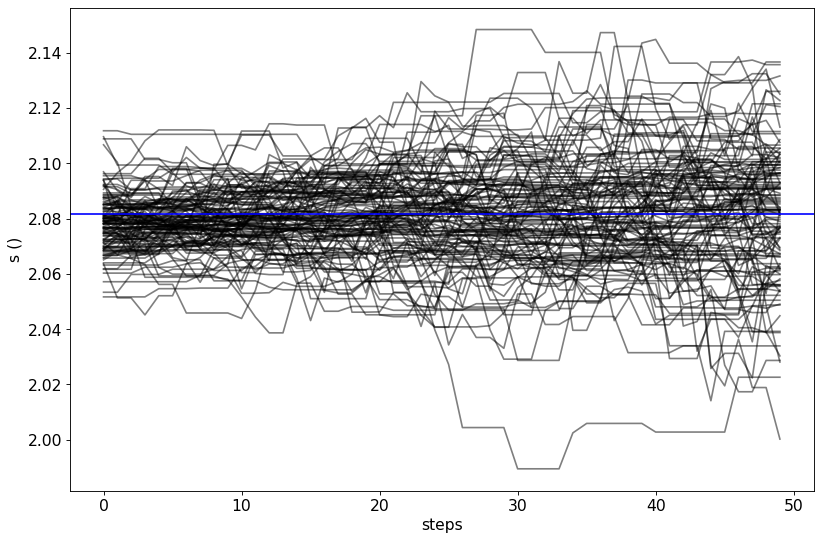

In [24]:
f=mcmc.plot_chain('s',log_plot=False)

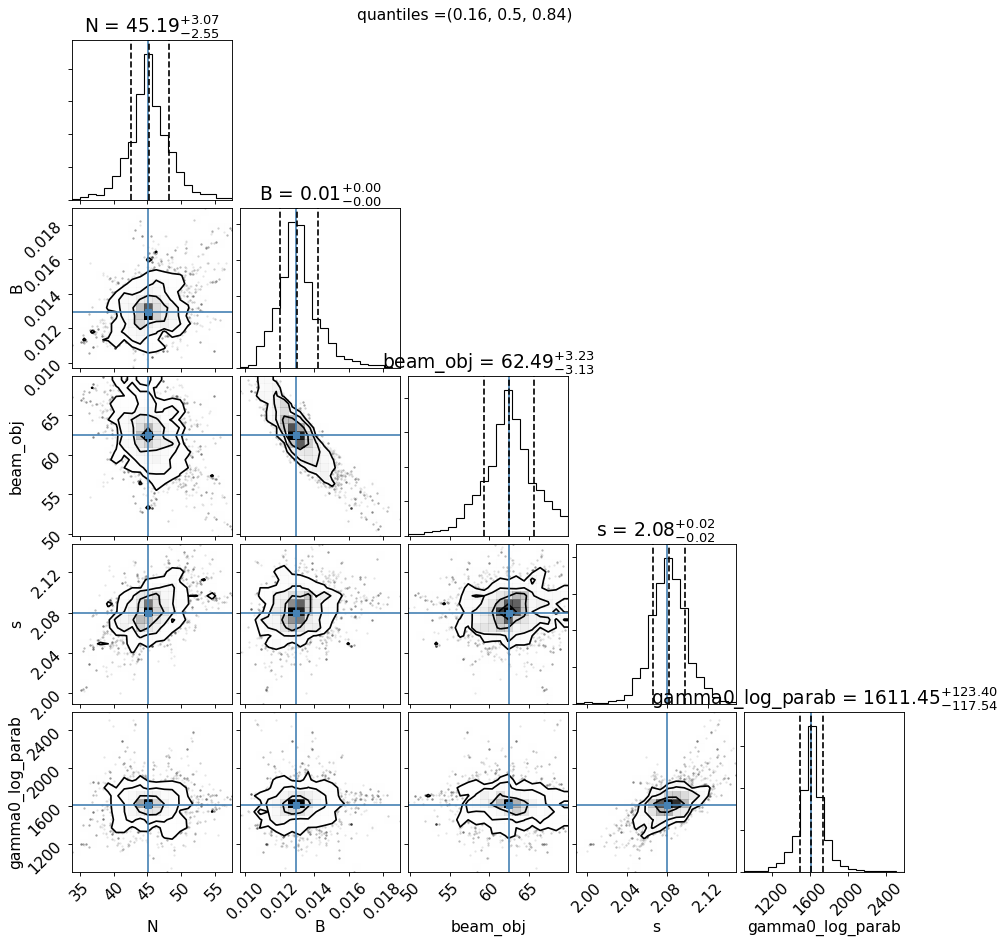

In [30]:
f=mcmc.corner_plot()

In [31]:
mcmc.get_par('N')

(array([47.76769413, 46.09330615, 44.88350113, ..., 41.41555984,
        46.36931083, 49.28365911]),
 0)

## saving MCMC and reusing it

In [32]:
mcmc.save('mcmc_sampler.pkl')

In [33]:
from jetset.mcmc import McmcSampler
from jetset.data_loader import ObsData
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs

sed_data=ObsData.load('Mrk_501.pkl')

ms=McmcSampler.load('mcmc_sampler.pkl')

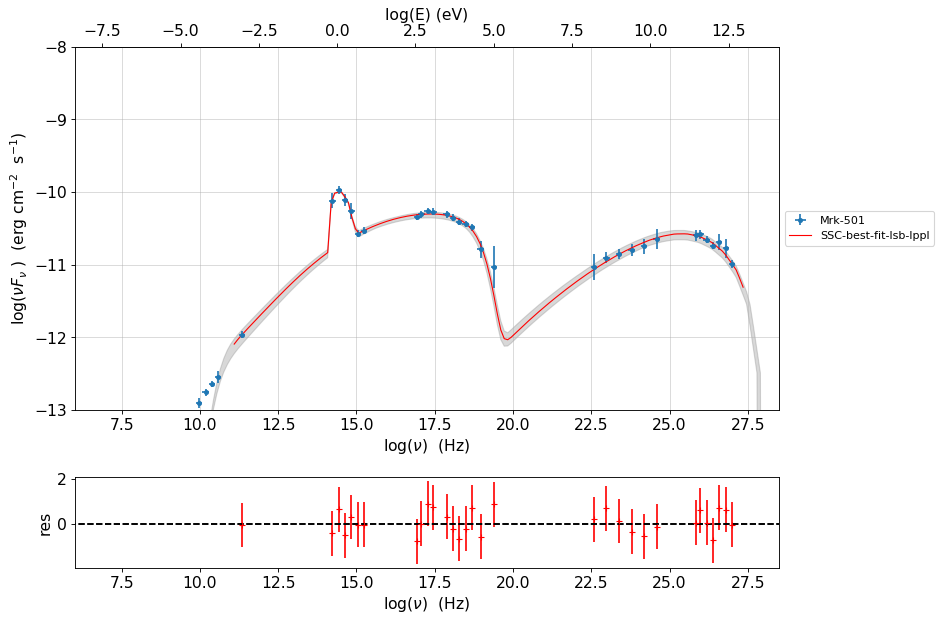

In [36]:
ms.model.set_nu_grid(1E8,1E30,200)
p=ms.plot_model(sed_data=sed_data,fit_range=[11., 27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

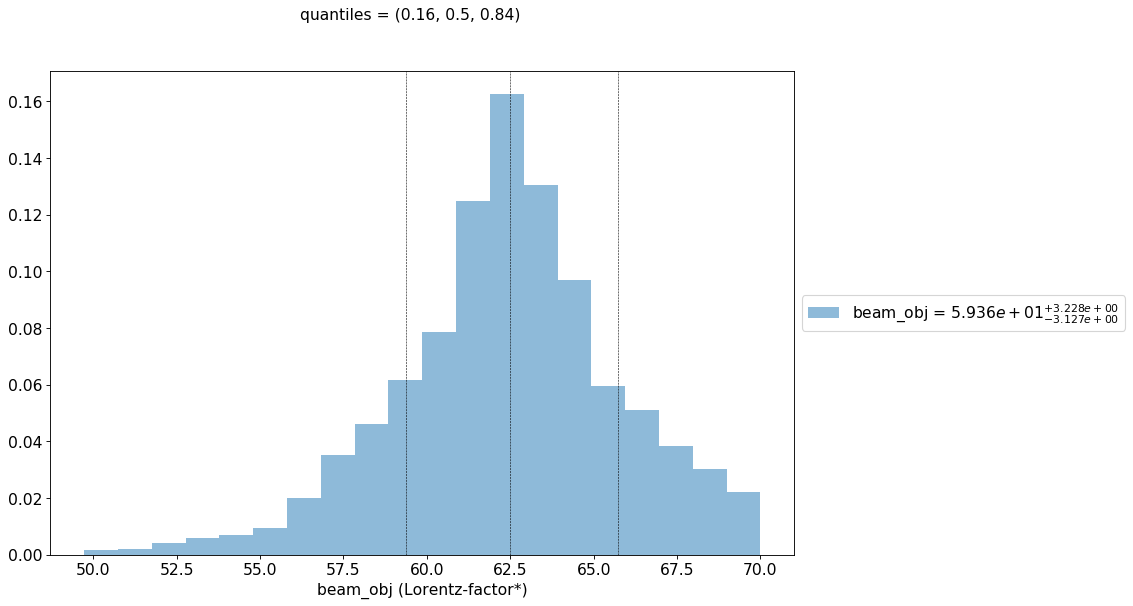

In [37]:
f=ms.plot_par('beam_obj',log_plot=False)


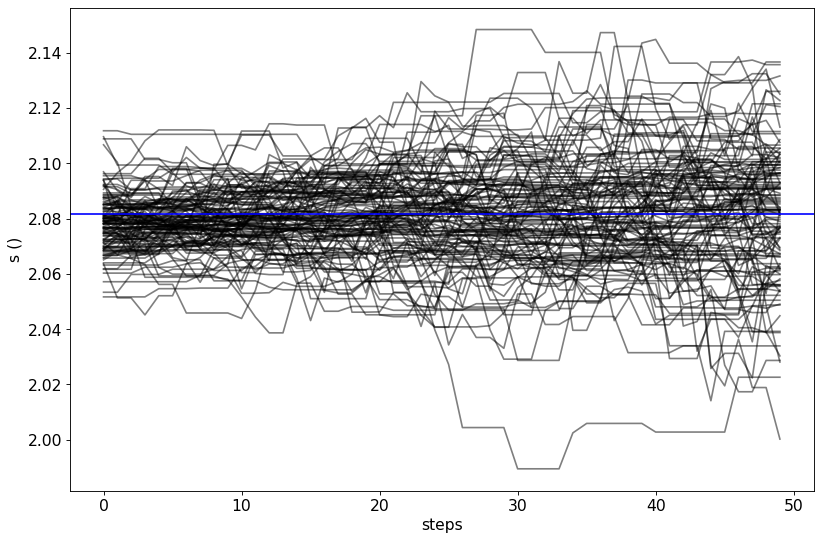

In [38]:
f=ms.plot_chain('s',log_plot=False)